In [ ]:
# pytorch深度学习书中的代码

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 预训练网络

In [2]:
from torchvision import models

In [3]:
# 查看视觉模型
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [5]:
# 采用预训练的模型
resnet = models.resnet101(pretrained=True)

D:\IDE_sources\Ancona\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\IDE_sources\Ancona\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\17677/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [6]:
# resnet的网络结构
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 预处理函数处理图片

In [7]:
from torchvision import transforms

In [9]:
preprocess = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [10]:
# 从本地加载一个图片
from PIL import Image

In [12]:
img = Image.open("./dog1.jpg")

In [13]:
# 查看图片
img.show()

In [16]:
img_t = preprocess(img)
img_t.shape

torch.Size([3, 224, 224])

In [17]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

## 运行模型（推理）

In [18]:
# 使用model.eval(),为了不启用 Batch Normalization 和 Dropout。保证直接利用训练好的方差
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
# 输出
output = resnet(batch_t)
output.shape

torch.Size([1, 1000])

In [28]:
# 采用softmax()将其归一化到[0,1]之间
percentage = F.softmax(output, dim=1)[0] * 100
percentage.shape

torch.Size([1000])

In [30]:
# 获取标签中值最大的一个的索引
_, index = torch.max(output, 1)
index

tensor([273])

In [46]:
# 加载正确的标签文件进行预测的值进行比对
with open("./data/kaggle_dog_tiny/kaggle_dog_tiny/labels.csv") as f:
    labels = [line.strip() for line in f.readlines()]

In [47]:
labels = labels[1:1002]

In [53]:
label = [labe.split(",")[1] for labe in labels]

In [55]:
label[index[0]], percentage[index[0]].item()

('cardigan', 93.18197631835938)

In [61]:
# 查出其他相近的分数的索引
_, indexs = torch.sort(output, descending=True)

tensor([273, 274, 271, 227, 286])

In [59]:
[(label[idx], percentage[idx].item()) for idx in indexs[0][:5]]

[('cardigan', 93.18197631835938),
 ('pekinese', 4.368319511413574),
 ('chow', 1.90672767162323),
 ('cairn', 0.12511059641838074),
 ('redbone', 0.11782658100128174)]

## CycleGAN

In [62]:
from torchvision import models

# 从张量开始

In [1]:
import torch

## 命名张量

In [3]:
img_t = torch.rand(2, 3, 5, 5)
weights = torch.tensor([0.2126, 0.7152, 0.0722])
img_t.shape, weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([3]))

In [4]:
# 张量的广播
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
unsqueezed_weights.shape

torch.Size([3, 1, 1])

In [5]:
img_weight = img_t * unsqueezed_weights
img_weight.shape

torch.Size([2, 3, 5, 5])

## 张量的元素类型

In [8]:
# 管理张量的dtype属性
doubles = torch.ones(2, 3, dtype=torch.double)
doubles.dtype

torch.float64

In [11]:
# 转换张量的dtype属性
doubles = torch.ones(2, 3).float()
doubles.dtype

torch.float32

In [12]:
doubles = torch.ones(2, 3).to(torch.float)
doubles.dtype

torch.float32

## 张量的存储视图

In [13]:
# 不带下滑线的操作创建一个新的张量
# 带下划线的就直接修改存储值

## 张量的元数据：大小，偏移量，步长

### 存储视图

In [14]:
points = torch.rand(3, 2)

In [15]:
sencond_point = points[1]
sencond_point.size()

torch.Size([2])

In [16]:
# 该维度的步长（dim = 1）
sencond_point.storage_offset()

2

In [18]:
# sencond_point表示已经提取到一个子张量
sencond_point.stride()

(1,)

In [17]:
# ponits的步长，步长是一个元组
points.stride()

(2, 1)

In [19]:
# 将子张量复制成一个新的张量,这样修改子张量的值不会改变原张量的值
sencond_point = points[1].clone()

### 无复制转置

In [25]:
data1 = torch.rand(2, 3)
data1

tensor([[0.7485, 0.7739, 0.8627],
        [0.3015, 0.6115, 0.5565]])

In [21]:
data1_t = data1.t()
data1_t

tensor([[0.2640, 0.7150],
        [0.1577, 0.5045],
        [0.2253, 0.1821]])

In [23]:
# 验证两个张量是否在统一存储区
id(data1.storage()) == id(data1_t.storage())

True

In [24]:
# 计算二者的步长
data1.stride(), data1_t.stride()

((3, 1), (1, 3))

### 高维转置

In [26]:
# 对dim=0,2进行转置
some_t = torch.ones(3, 4, 5)
transpose_t = some_t.transpose(0, 2)

In [27]:
some_t.shape, transpose_t.shape

(torch.Size([3, 4, 5]), torch.Size([5, 4, 3]))

In [28]:
# 查看转置后的步长:转置过程中相当于将步长也转置了
some_t.stride(), transpose_t.stride()

((20, 5, 1), (1, 5, 20))

### 连续张量

In [29]:
# 判断张量是否连续
data2 = torch.rand(2, 3)
data2_t = data2.t()

In [31]:
data2.is_contiguous(), data2_t.is_contiguous()

(True, False)

In [35]:
# 使用contiguouts()方法将一个非连续的张量转成连续的张量
points = torch.randn(3, 2)
points_t = points.t()
points.storage(), points_t.storage()

( 1.2152541875839233
  0.4683937728404999
  1.6144567728042603
  0.7564772963523865
  -1.3899544477462769
  0.6176654100418091
 [torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6],
  1.2152541875839233
  0.4683937728404999
  1.6144567728042603
  0.7564772963523865
  -1.3899544477462769
  0.6176654100418091
 [torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6])

In [36]:
points_t_cont = points_t.contiguous()
points.storage(), points_t_cont.storage()

( 1.2152541875839233
  0.4683937728404999
  1.6144567728042603
  0.7564772963523865
  -1.3899544477462769
  0.6176654100418091
 [torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6],
  1.2152541875839233
  1.6144567728042603
  -1.3899544477462769
  0.4683937728404999
  0.7564772963523865
  0.6176654100418091
 [torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6])

## 将张量存储到GPU

In [39]:
# 张量的device属性
points_gpu = torch.randn(3, 4, device="cuda")
points_gpu

tensor([[-0.1886,  0.1130, -0.1234, -0.5679],
        [-0.3028, -0.2146,  1.7590, -0.8230],
        [ 0.8542, -0.5255, -0.1855, -0.2578]], device='cuda:0')

In [40]:
# 使用to()方法
points_gpu = points_gpu.to(device="cuda")
points_gpu

tensor([[-0.1886,  0.1130, -0.1234, -0.5679],
        [-0.3028, -0.2146,  1.7590, -0.8230],
        [ 0.8542, -0.5255, -0.1855, -0.2578]], device='cuda:0')

In [41]:
# 多个device
points_gpu = points_gpu.to(device="cuda:0")

In [42]:
points_gpu = points_gpu.cuda(0)

## Numpy的互操作性

In [46]:
# 张量转numpy
points = torch.ones(3, 5)
points_np = points.numpy()
points, points_np

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32))

In [48]:
# numpy转张量
points = torch.from_numpy(points_np)
points

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

## 序列化张量

In [49]:
# 保存张量
points = torch.randn(2, 5, 3, 6)

In [50]:
torch.save(points, "./outpoints.t")

In [57]:
# 采用文件描述符进行保存
with open("./outpoints.t", "wb") as f:
    torch.save(points, f)

In [53]:
# 加载张量
points = torch.load("./outpoints.t")
points

tensor([[[[ 1.5985, -1.3966, -0.0301, -1.5711, -0.7145,  0.9171],
          [ 0.4237, -0.3221,  0.0957,  0.3949, -0.9714, -0.7392],
          [ 0.6487, -0.3258,  1.1058,  0.2172,  0.9371, -0.0374]],

         [[ 0.8847, -1.4842,  1.3632, -0.9938,  1.6148, -1.0672],
          [ 0.2625, -0.3193,  0.5804, -2.5769,  0.7943,  0.1847],
          [ 0.3949,  1.0871,  0.0359,  0.2206,  0.3696,  0.0839]],

         [[-0.4030, -0.8502, -1.6927,  0.0286, -1.5605, -0.7584],
          [-0.5948,  0.7187,  0.7420,  0.9259, -0.9710,  0.6006],
          [ 0.7598,  1.5471,  0.0380, -0.2623, -0.7264,  0.2763]],

         [[-0.7502, -0.1854,  0.3042,  1.1587,  0.4386,  0.2466],
          [-0.3947,  0.1689,  1.0417,  0.5741, -0.4838, -0.1908],
          [ 0.4964,  0.5962, -0.8045, -1.1767,  0.5845, -0.2876]],

         [[ 0.7274, -1.2526, -0.5741, -0.1670, -1.1058,  1.3004],
          [ 1.4659, -0.5734, -1.8955,  0.4307,  1.2747,  0.5249],
          [ 1.3843, -0.3841, -0.4849,  1.1013, -0.4555,  1.2981]]],


In [58]:
with open("./outpoints.t", "rb") as f:
    points = torch.load(f)
points

tensor([[[[ 1.5985, -1.3966, -0.0301, -1.5711, -0.7145,  0.9171],
          [ 0.4237, -0.3221,  0.0957,  0.3949, -0.9714, -0.7392],
          [ 0.6487, -0.3258,  1.1058,  0.2172,  0.9371, -0.0374]],

         [[ 0.8847, -1.4842,  1.3632, -0.9938,  1.6148, -1.0672],
          [ 0.2625, -0.3193,  0.5804, -2.5769,  0.7943,  0.1847],
          [ 0.3949,  1.0871,  0.0359,  0.2206,  0.3696,  0.0839]],

         [[-0.4030, -0.8502, -1.6927,  0.0286, -1.5605, -0.7584],
          [-0.5948,  0.7187,  0.7420,  0.9259, -0.9710,  0.6006],
          [ 0.7598,  1.5471,  0.0380, -0.2623, -0.7264,  0.2763]],

         [[-0.7502, -0.1854,  0.3042,  1.1587,  0.4386,  0.2466],
          [-0.3947,  0.1689,  1.0417,  0.5741, -0.4838, -0.1908],
          [ 0.4964,  0.5962, -0.8045, -1.1767,  0.5845, -0.2876]],

         [[ 0.7274, -1.2526, -0.5741, -0.1670, -1.1058,  1.3004],
          [ 1.4659, -0.5734, -1.8955,  0.4307,  1.2747,  0.5249],
          [ 1.3843, -0.3841, -0.4849,  1.1013, -0.4555,  1.2981]]],


## 练习

In [60]:
# 1
a = torch.tensor(list(range(9)))
a.shape, a.storage_offset(), a.stride()

(torch.Size([9]), 0, (1,))

In [61]:
# a
b = a.view(3, 3)
b

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [62]:
id(a.storage()) == id(b.storage())  # 使用同一个内存

True

In [63]:
# b
c = b[1:, 1:]
c.shape, c.storage_offset(), a.stride()

(torch.Size([2, 2]), 4, (1,))

In [64]:
# 2.
d = torch.acos(b)
b, d

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[1.5708, 0.0000,    nan],
         [   nan,    nan,    nan],
         [   nan,    nan,    nan]]))

# 使用张量表示真实数据

In [5]:
import torch

## 处理图像

In [2]:
import os

import imageio

In [3]:
img_arr = imageio.imread("./pic2_5.jpg")
img_arr.shape  # (H,W,C)

C:\Users\17677\AppData\Local\Temp\ipykernel_10692\2249019970.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('./pic2_5.jpg')


(720, 1280, 3)

In [4]:
# 改变布局
img = torch.from_numpy(img_arr)

In [5]:
out_img = img.permute(2, 0, 1)
out_img.shape  # (C,H,W)

torch.Size([3, 720, 1280])

In [12]:
# 增加批次改变布局
# 1.预先分配一个批次大小的张量
img_path = "D:\code\crawls\pictures"
img_paths = os.listdir("D:\code\crawls\pictures")
batch_size = len(img_paths)
img_paths

['pic2_1.jpg',
 'pic2_10.jpg',
 'pic2_11.jpg',
 'pic2_12.jpg',
 'pic2_13.jpg',
 'pic2_14.jpg',
 'pic2_15.jpg',
 'pic2_2.jpg',
 'pic2_3.jpg',
 'pic2_4.jpg',
 'pic2_5.jpg',
 'pic2_6.jpg',
 'pic2_7.jpg',
 'pic2_8.jpg',
 'pic2_9.jpg']

In [11]:
batch = torch.zeros(batch_size, 3, 720, 1280, dtype=torch.uint8)

In [15]:
filenames = [img_path + "\\" + name for name in img_paths]

In [16]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(filename)
    img = torch.from_numpy(img_arr)
    img = img.permute(2, 0, 1)
    img = img[:3]
    batch[i] = img

C:\Users\17677\AppData\Local\Temp\ipykernel_10692\3511066752.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(filename)


In [20]:
# 正规化数据
# 1.对像素进行归一化
batch1 = batch.float()
batch1 = batch / 255.0
batch[:1], batch1[:1]

(tensor([[[[161, 160, 166,  ...,  54,  55,  63],
           [163, 160, 165,  ...,  52,  54,  61],
           [166, 164, 168,  ...,  57,  55,  57],
           ...,
           [ 61,  62,  47,  ..., 147, 144, 142],
           [ 73,  64,  67,  ..., 141, 139, 136],
           [ 81,  51,  68,  ..., 137, 137, 133]],
 
          [[206, 206, 208,  ...,  89,  89,  97],
           [208, 206, 207,  ...,  87,  88,  95],
           [212, 208, 210,  ...,  92,  90,  91],
           ...,
           [121, 120, 105,  ..., 179, 176, 176],
           [131, 122, 125,  ..., 175, 175, 174],
           [139, 109, 126,  ..., 173, 175, 173]],
 
          [[235, 232, 233,  ..., 121, 124, 132],
           [237, 232, 232,  ..., 119, 123, 130],
           [238, 235, 235,  ..., 124, 122, 126],
           ...,
           [184, 184, 169,  ..., 228, 225, 224],
           [194, 185, 189,  ..., 223, 223, 221],
           [202, 172, 190,  ..., 221, 222, 222]]]], dtype=torch.uint8),
 tensor([[[[0.6314, 0.6275, 0.6510,  ...,

In [24]:
# 2.按均值和方差进行归一化(按照通道进行归一化)
n_channels = batch1.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch1[:, c])
    std = torch.std(batch1[:, c])
    batch1[:, c] = (batch1[:, c] - mean) / std

In [25]:
batch[:, 1], batch1[:, 1]

(tensor([[[206, 206, 208,  ...,  89,  89,  97],
          [208, 206, 207,  ...,  87,  88,  95],
          [212, 208, 210,  ...,  92,  90,  91],
          ...,
          [121, 120, 105,  ..., 179, 176, 176],
          [131, 122, 125,  ..., 175, 175, 174],
          [139, 109, 126,  ..., 173, 175, 173]],
 
         [[105, 106, 105,  ..., 100, 100,  99],
          [105, 106, 105,  ..., 100, 100, 100],
          [105, 106, 105,  ..., 100, 101, 101],
          ...,
          [ 45,  47,  43,  ...,  99,  96,  96],
          [ 44,  48,  43,  ...,  98,  97,  98],
          [ 44,  48,  43,  ...,  96,  97, 100]],
 
         [[  1,   2,   4,  ...,  30,  30,  30],
          [  1,   1,   1,  ...,  30,  30,  30],
          [  3,   4,   4,  ...,  30,  30,  30],
          ...,
          [ 36,  30,  32,  ...,  30,  30,  30],
          [ 35,  25,  23,  ...,  30,  30,  30],
          [ 30,  27,  32,  ...,  30,  30,  30]],
 
         ...,
 
         [[ 79,  76,  72,  ...,  80,  74,  69],
          [ 75,  7

## 处理表格

In [1]:
# 1.加载表格中的数据
import csv

import numpy as np

In [38]:
data_path = "../机器学习训练/zhengqi_test.txt"
data_numpy = np.loadtxt(data_path, dtype=np.float32, delimiter="\t", skiprows=1)
data_numpy[:3]

array([[ 0.368,  0.38 , -0.225, -0.049,  0.379,  0.092,  0.55 ,  0.551,
         0.244,  0.904, -0.419,  0.515,  0.346, -0.114, -0.204,  0.239,
        -0.089,  0.961,  0.247,  0.899, -0.252,  0.628, -0.063,  0.098,
        -1.314, -0.662, -0.596,  0.208, -0.449,  0.047,  0.057, -0.042,
         0.847,  0.534, -0.009, -0.19 , -0.567,  0.388],
       [ 0.148,  0.489, -0.247, -0.049,  0.122, -0.201,  0.487,  0.493,
        -0.127,  0.904, -0.403, -0.324,  0.465,  0.653,  0.148, -0.113,
        -0.093,  0.961,  0.073,  1.168, -0.276,  0.009, -0.063,  0.09 ,
        -1.31 , -0.646, -0.776,  0.226, -0.443,  0.047,  0.56 ,  0.176,
         0.551,  0.046, -0.22 ,  0.008, -0.294,  0.104],
       [-0.166, -0.062, -0.311,  0.046, -0.055,  0.063,  0.485,  0.493,
        -0.227,  0.904,  0.33 ,  0.389,  0.173,  0.398,  0.068, -0.192,
        -0.061,  0.961,  0.07 ,  0.98 , -0.34 ,  0.27 , -0.063,  0.091,
        -1.31 , -0.473, -0.607,  0.084, -0.458, -0.398,  0.101,  0.199,
         0.634,  0.017

In [46]:
col_list = next(csv.reader(open(data_path), delimiter="\t"))  # 读取每行的列表csv.reader

In [47]:
data_numpy.shape, col_list

((1925, 38),
 ['V0',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34',
  'V35',
  'V36',
  'V37'])

In [50]:
# 将numpy转成pytorch
data_p = torch.from_numpy(data_numpy)
data_p.shape, data_p.dtype

(torch.Size([1925, 38]), torch.float32)

In [51]:
# 2.表示得分
# 将最后一行作为分数进行表示
data_y = data_p[:, -1]
data_x = data_p[:, :-1]
data_x.shape, data_y.shape

(torch.Size([1925, 37]), torch.Size([1925]))

In [54]:
# 将分数转换成整数向量（分类）：适用于连续的分数
data_y = data_y * 10
data_y = data_y.long()
data_y[:10]

tensor([ 30,  10,  50,  30, -40,  10, 100, -40, -10, -20])

In [73]:
# 当得分是字符串的时候，采用独热编码：适用于离散的分数
target = torch.arange(10)
target_onehot = torch.zeros(target.shape[0], 10)
target, target_onehot

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [74]:
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [75]:
# 3.对数据进行归一化
data_mean = torch.mean(data_x, dim=0)
data_var = torch.var(data_x, dim=0)  # 方差,std是标准差
data_mean, data_var

(tensor([-0.1844, -0.0839, -0.4348,  0.1017, -0.0192,  0.8380, -0.2741, -0.1740,
         -0.2667,  0.2551, -0.0517,  0.5471, -0.0346, -0.2937, -0.0242, -0.1441,
         -0.1703,  0.0654, -0.0824,  0.1728,  0.2792,  0.0852, -0.4548, -0.2340,
          0.0321,  0.0772, -0.1085, -0.4086, -0.2069, -0.1465, -0.0832, -0.1917,
         -0.0308, -0.0114, -0.0100, -0.2969, -0.0463]),
 tensor([1.1520, 1.1592, 0.9400, 1.0711, 1.3163, 0.9275, 1.1112, 1.0818, 1.1792,
         1.0290, 1.0899, 0.8964, 1.2996, 1.0796, 0.9524, 0.8650, 1.0024, 1.8490,
         1.1256, 0.6068, 1.4380, 1.5729, 1.5431, 0.9723, 0.8978, 1.2324, 1.2937,
         2.1129, 1.1324, 0.7754, 1.2688, 1.2961, 1.2774, 0.9796, 0.9904, 0.8966,
         1.0834]))

In [77]:
# 进行归一化
data_normalized = (data_x - data_mean) / torch.sqrt(data_var)
data_normalized[:10]

tensor([[ 5.1466e-01,  4.3088e-01,  2.1635e-01, -1.4559e-01,  3.4706e-01,
         -7.7468e-01,  7.8178e-01,  6.9702e-01,  4.7030e-01,  6.3968e-01,
         -3.5182e-01, -3.3859e-02,  3.3385e-01,  1.7298e-01, -1.8419e-01,
          4.1193e-01,  8.1244e-02,  6.5861e-01,  3.1050e-01,  9.3224e-01,
         -4.4302e-01,  4.3284e-01,  3.1537e-01,  3.3664e-01, -1.4206e+00,
         -6.6585e-01, -4.2863e-01,  4.2417e-01, -2.2754e-01,  2.1970e-01,
          1.2448e-01,  1.3152e-01,  7.7664e-01,  5.5109e-01,  9.9021e-04,
          1.1289e-01, -5.0029e-01],
        [ 3.0969e-01,  5.3211e-01,  1.9366e-01, -1.4559e-01,  1.2305e-01,
         -1.0789e+00,  7.2202e-01,  6.4126e-01,  1.2866e-01,  6.3968e-01,
         -3.3650e-01, -9.2000e-01,  4.3824e-01,  9.1117e-01,  1.7649e-01,
          3.3465e-02,  7.7248e-02,  6.5861e-01,  1.4650e-01,  1.2776e+00,
         -4.6303e-01, -6.0723e-02,  3.1537e-01,  3.2853e-01, -1.4164e+00,
         -6.5144e-01, -5.8689e-01,  4.3655e-01, -2.2190e-01,  2.1970e-01,
  

## 处理时间序列

In [1]:
import numpy as np

In [7]:
dir = "../深度学习/Bike-Sharing-Dataset/hour.csv"
bikes_numpy = np.loadtxt(
    dir,
    dtype=np.float32,
    delimiter=",",
    skiprows=1,
    converters={1: lambda x: float(x[8:10])},
)

In [18]:
bikes = torch.from_numpy(bikes_numpy)
bike = torch.zeros(bikes.shape[0] + 141, bikes.shape[1])
for i, data in enumerate(bikes):
    bike[i] = bikes[i]
for j in range(140):
    bike[j + 17380] = bike[j]
bike.shape

torch.Size([17520, 17])

In [19]:
bike.shape, bike.stride()

(torch.Size([17520, 17]), (17, 1))

In [20]:
# 按时间段调整数据
daily_bikes = bike.view(-1, 24, bike.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [23]:
# 转置张量(N, C, L) N:时间
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

## 表示文本

In [63]:
from nltk.corpus import gutenberg

In [64]:
# 将字符表示成张量
# 1.导入文本
text = gutenberg.sents("milton-paradise.txt")
len(text)

1851

In [65]:
# 2.创建一个独热编码
letter_t = torch.zeros(len(text[:100]), 128)
letter_t.shape

torch.Size([100, 128])

In [66]:
texts = [texts for texts in text[:10]]

In [67]:
word = 'abcdefghijklmnopqrstuvwxyz1234567890'
text = [[] for i in range(10)]
for j, text1 in enumerate(texts):
    for index, text2 in enumerate(text1):
        for i in text2:
            if i in word:
                text[j].append(text2)

In [68]:
for texts in text:
    for i, letters in enumerate(texts):
        for j, letter in enumerate(letters):
            letter_index = ord(letter) if ord(letter) < 128 else 0
            letter_t[j][letter_index] = 1

In [70]:
# 对单词进行独热编码

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# 学习的机制

In [2]:
import torch

## 参数估计

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


In [42]:
t_c = np.random.randn(10)  # x
t_u = np.random.randn(10)  # y
t_c.shape, t_u.shape

((10,), (10,))

In [44]:
t_c = np.sort(t_c,axis=0,)
t_u = np.sort(t_u,axis=0)
t_c, t_u

(array([-1.11644098, -1.00546251, -0.83249803, -0.46694137, -0.35890798,
        -0.04885306,  0.28523964,  1.36041094,  1.37550674,  1.7818893 ]),
 array([-1.32610827, -0.94224577, -0.90895307,  0.36949312,  0.37874313,
         0.42584942,  0.46658586,  1.01596096,  1.59756346,  1.66784095]))

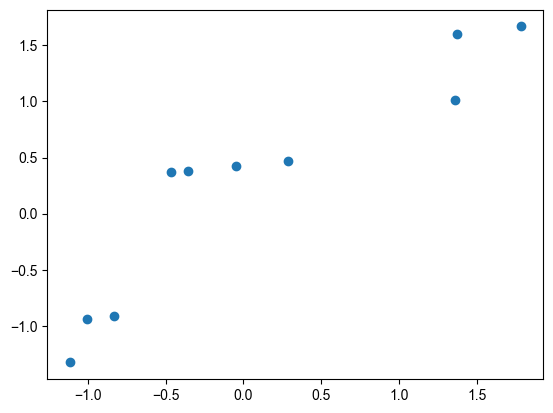

In [47]:
# 绘制x_y分布图
plt.scatter(t_c, t_u)
plt.style.use('seaborn-darkgrid') # 设置画图的风格 
plt.show()

In [48]:
# 设计模型
def model(t_c, w, b):
    return w*t_c + b

In [49]:
# 设计损失（均方差损失）
def loss_fn(t_p, t_u):
    squ = (t_u - t_p)**2
    return squ.mean()

In [56]:
# 初始化权重
w = torch.ones(())
b = torch.ones(())

In [57]:
# 依据model获得输出
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_p = model(t_u, w, b)
t_p, t_u

C:\Users\17677\AppData\Local\Temp\ipykernel_5948\2139014505.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_c = torch.tensor(t_c)
C:\Users\17677\AppData\Local\Temp\ipykernel_5948\2139014505.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_u = torch.tensor(t_u)


(tensor([-0.3261,  0.0578,  0.0910,  1.3695,  1.3787,  1.4258,  1.4666,  2.0160,
          2.5976,  2.6678], dtype=torch.float64),
 tensor([-1.3261, -0.9422, -0.9090,  0.3695,  0.3787,  0.4258,  0.4666,  1.0160,
          1.5976,  1.6678], dtype=torch.float64))

In [59]:
# 检验损失
loss = loss_fn(t_p, t_u)
loss.item()

1.0

## 张量的广播机制

In [63]:
x = torch.ones(())
y = torch.ones((3,1))
z = torch.ones((1,3))
a = torch.ones((2,1,1))

In [64]:
print(f"shapes: x:{x.shape}, y:{y.shape}")
print(f"shapes: z:{z.shape}, a:{a.shape}")

shapes: x:torch.Size([]), y:torch.Size([3, 1])
shapes: z:torch.Size([1, 3]), a:torch.Size([2, 1, 1])


In [65]:
print("x * y:", (x*y).shape)
print("y * z:", (y*z).shape)
print("y * z * a", (y*z*a).shape)

x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a torch.Size([2, 3, 3])


## 梯度下降

In [66]:
# 减小损失
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_c, w+delta, b), t_u) 
                         - loss_fn(model(t_c, w-delta,b), t_u)) / (2.0*delta)

In [67]:
# 学习步长
# 目标找到损失的最小极值点
# w = w - deltaw*f(w)
learning_rate = 1e-2
w = w - learning_rate*loss_rate_of_change_w

In [68]:
# 对参数b使用相同的方式
loss_rate_of_change_b = (loss_fn(model(t_c, b+delta, b), t_u) 
                         - loss_fn(model(t_c, b-delta,b), t_u)) / (2.0*delta)
b = b - learning_rate*loss_rate_of_change_b

In [69]:
# 计算导数
def dloss_fn(t_p, t_u):
    dsq_diffs = 2 * (t_p - t_u)/t_p.size(0)
    return dsq_diffs

In [70]:
# 将导数应用到模型中
def dmodel_dw(t_c, w, b):
    return t_c

In [71]:
def dmodel_db(t_c, w, b):
    return 1

In [72]:
# 定义梯度函数
# 沿着一个新维度对输入张量序列进行连接。 序列中所有的张量都应该为相同形状
def grad_fn(t_c, t_u, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_u)
    dloss_dw = dloss_dtp*dmodel_dw(t_c, w, b)
    dloss_db = dloss_dtp*dmodel_db(t_c, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [78]:
# 迭代训练以适应模型
# 1.循环训练
def training_loop(n_epochs, learning_rate, params, t_c, t_u):
    for epoch in range(1, n_epochs+1):
        w, b = params
        t_p = model(t_c, w, b)  #正向传播
        loss = loss_fn(t_p, t_u) #计算损失
        grad = grad_fn(t_c, t_u, t_p, w, b) #计算梯度
        params = params - learning_rate*grad
        print('Epoch: %d, Loss: %f' % (epoch, float(loss)))
        print('grad:',grad)
        print('params:',params)
    return params

In [79]:
training_loop(n_epochs=100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch: 1, Loss: 0.173674
grad: tensor([ 0.1518, -0.3542], dtype=torch.float64)
params: tensor([0.9985, 0.0035], dtype=torch.float64)
Epoch: 2, Loss: 0.172204
grad: tensor([ 0.1494, -0.3474], dtype=torch.float64)
params: tensor([0.9970, 0.0070], dtype=torch.float64)
Epoch: 3, Loss: 0.170787
grad: tensor([ 0.1470, -0.3407], dtype=torch.float64)
params: tensor([0.9955, 0.0104], dtype=torch.float64)
Epoch: 4, Loss: 0.169423
grad: tensor([ 0.1446, -0.3342], dtype=torch.float64)
params: tensor([0.9941, 0.0138], dtype=torch.float64)
Epoch: 5, Loss: 0.168110
grad: tensor([ 0.1423, -0.3278], dtype=torch.float64)
params: tensor([0.9927, 0.0170], dtype=torch.float64)
Epoch: 6, Loss: 0.166845
grad: tensor([ 0.1400, -0.3215], dtype=torch.float64)
params: tensor([0.9913, 0.0203], dtype=torch.float64)
Epoch: 7, Loss: 0.165627
grad: tensor([ 0.1377, -0.3153], dtype=torch.float64)
params: tensor([0.9899, 0.0234], dtype=torch.float64)
Epoch: 8, Loss: 0.164454
grad: tensor([ 0.1355, -0.3093], dtype=torch

tensor([0.9251, 0.1585], dtype=torch.float64)

In [81]:
# 归一化处理输入（将参数放到差不多的尺度空间）
t_cn = t_c * 0.1

In [82]:
training_loop(n_epochs=100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_cn)

Epoch: 1, Loss: 1.032792
grad: tensor([-0.0189, -0.5470], dtype=torch.float64)
params: tensor([1.0002, 0.0055], dtype=torch.float64)
Epoch: 2, Loss: 1.029826
grad: tensor([-0.0189, -0.5361], dtype=torch.float64)
params: tensor([1.0004, 0.0108], dtype=torch.float64)
Epoch: 3, Loss: 1.026978
grad: tensor([-0.0189, -0.5253], dtype=torch.float64)
params: tensor([1.0006, 0.0161], dtype=torch.float64)
Epoch: 4, Loss: 1.024242
grad: tensor([-0.0188, -0.5148], dtype=torch.float64)
params: tensor([1.0008, 0.0212], dtype=torch.float64)
Epoch: 5, Loss: 1.021614
grad: tensor([-0.0188, -0.5045], dtype=torch.float64)
params: tensor([1.0009, 0.0263], dtype=torch.float64)
Epoch: 6, Loss: 1.019091
grad: tensor([-0.0188, -0.4944], dtype=torch.float64)
params: tensor([1.0011, 0.0312], dtype=torch.float64)
Epoch: 7, Loss: 1.016667
grad: tensor([-0.0188, -0.4846], dtype=torch.float64)
params: tensor([1.0013, 0.0361], dtype=torch.float64)
Epoch: 8, Loss: 1.014339
grad: tensor([-0.0188, -0.4749], dtype=torch

tensor([1.0186, 0.2372], dtype=torch.float64)

In [90]:
# 将数据进行可视化
params = training_loop(n_epochs=500, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_cn)
t_p = model(t_cn, *params)
params

Epoch: 1, Loss: 1.032792
grad: tensor([-0.0189, -0.5470], dtype=torch.float64)
params: tensor([1.0000e+00, 5.4700e-05], dtype=torch.float64)
Epoch: 2, Loss: 1.032762
grad: tensor([-0.0189, -0.5469], dtype=torch.float64)
params: tensor([1.0000e+00, 1.0939e-04], dtype=torch.float64)
Epoch: 3, Loss: 1.032732
grad: tensor([-0.0189, -0.5468], dtype=torch.float64)
params: tensor([1.0000e+00, 1.6407e-04], dtype=torch.float64)
Epoch: 4, Loss: 1.032702
grad: tensor([-0.0189, -0.5467], dtype=torch.float64)
params: tensor([1.0000e+00, 2.1873e-04], dtype=torch.float64)
Epoch: 5, Loss: 1.032672
grad: tensor([-0.0189, -0.5466], dtype=torch.float64)
params: tensor([1.0000e+00, 2.7339e-04], dtype=torch.float64)
Epoch: 6, Loss: 1.032642
grad: tensor([-0.0189, -0.5465], dtype=torch.float64)
params: tensor([1.0000e+00, 3.2803e-04], dtype=torch.float64)
Epoch: 7, Loss: 1.032612
grad: tensor([-0.0189, -0.5463], dtype=torch.float64)
params: tensor([1.0000e+00, 3.8267e-04], dtype=torch.float64)
Epoch: 8, Los

tensor([1.0009, 0.0260], dtype=torch.float64)

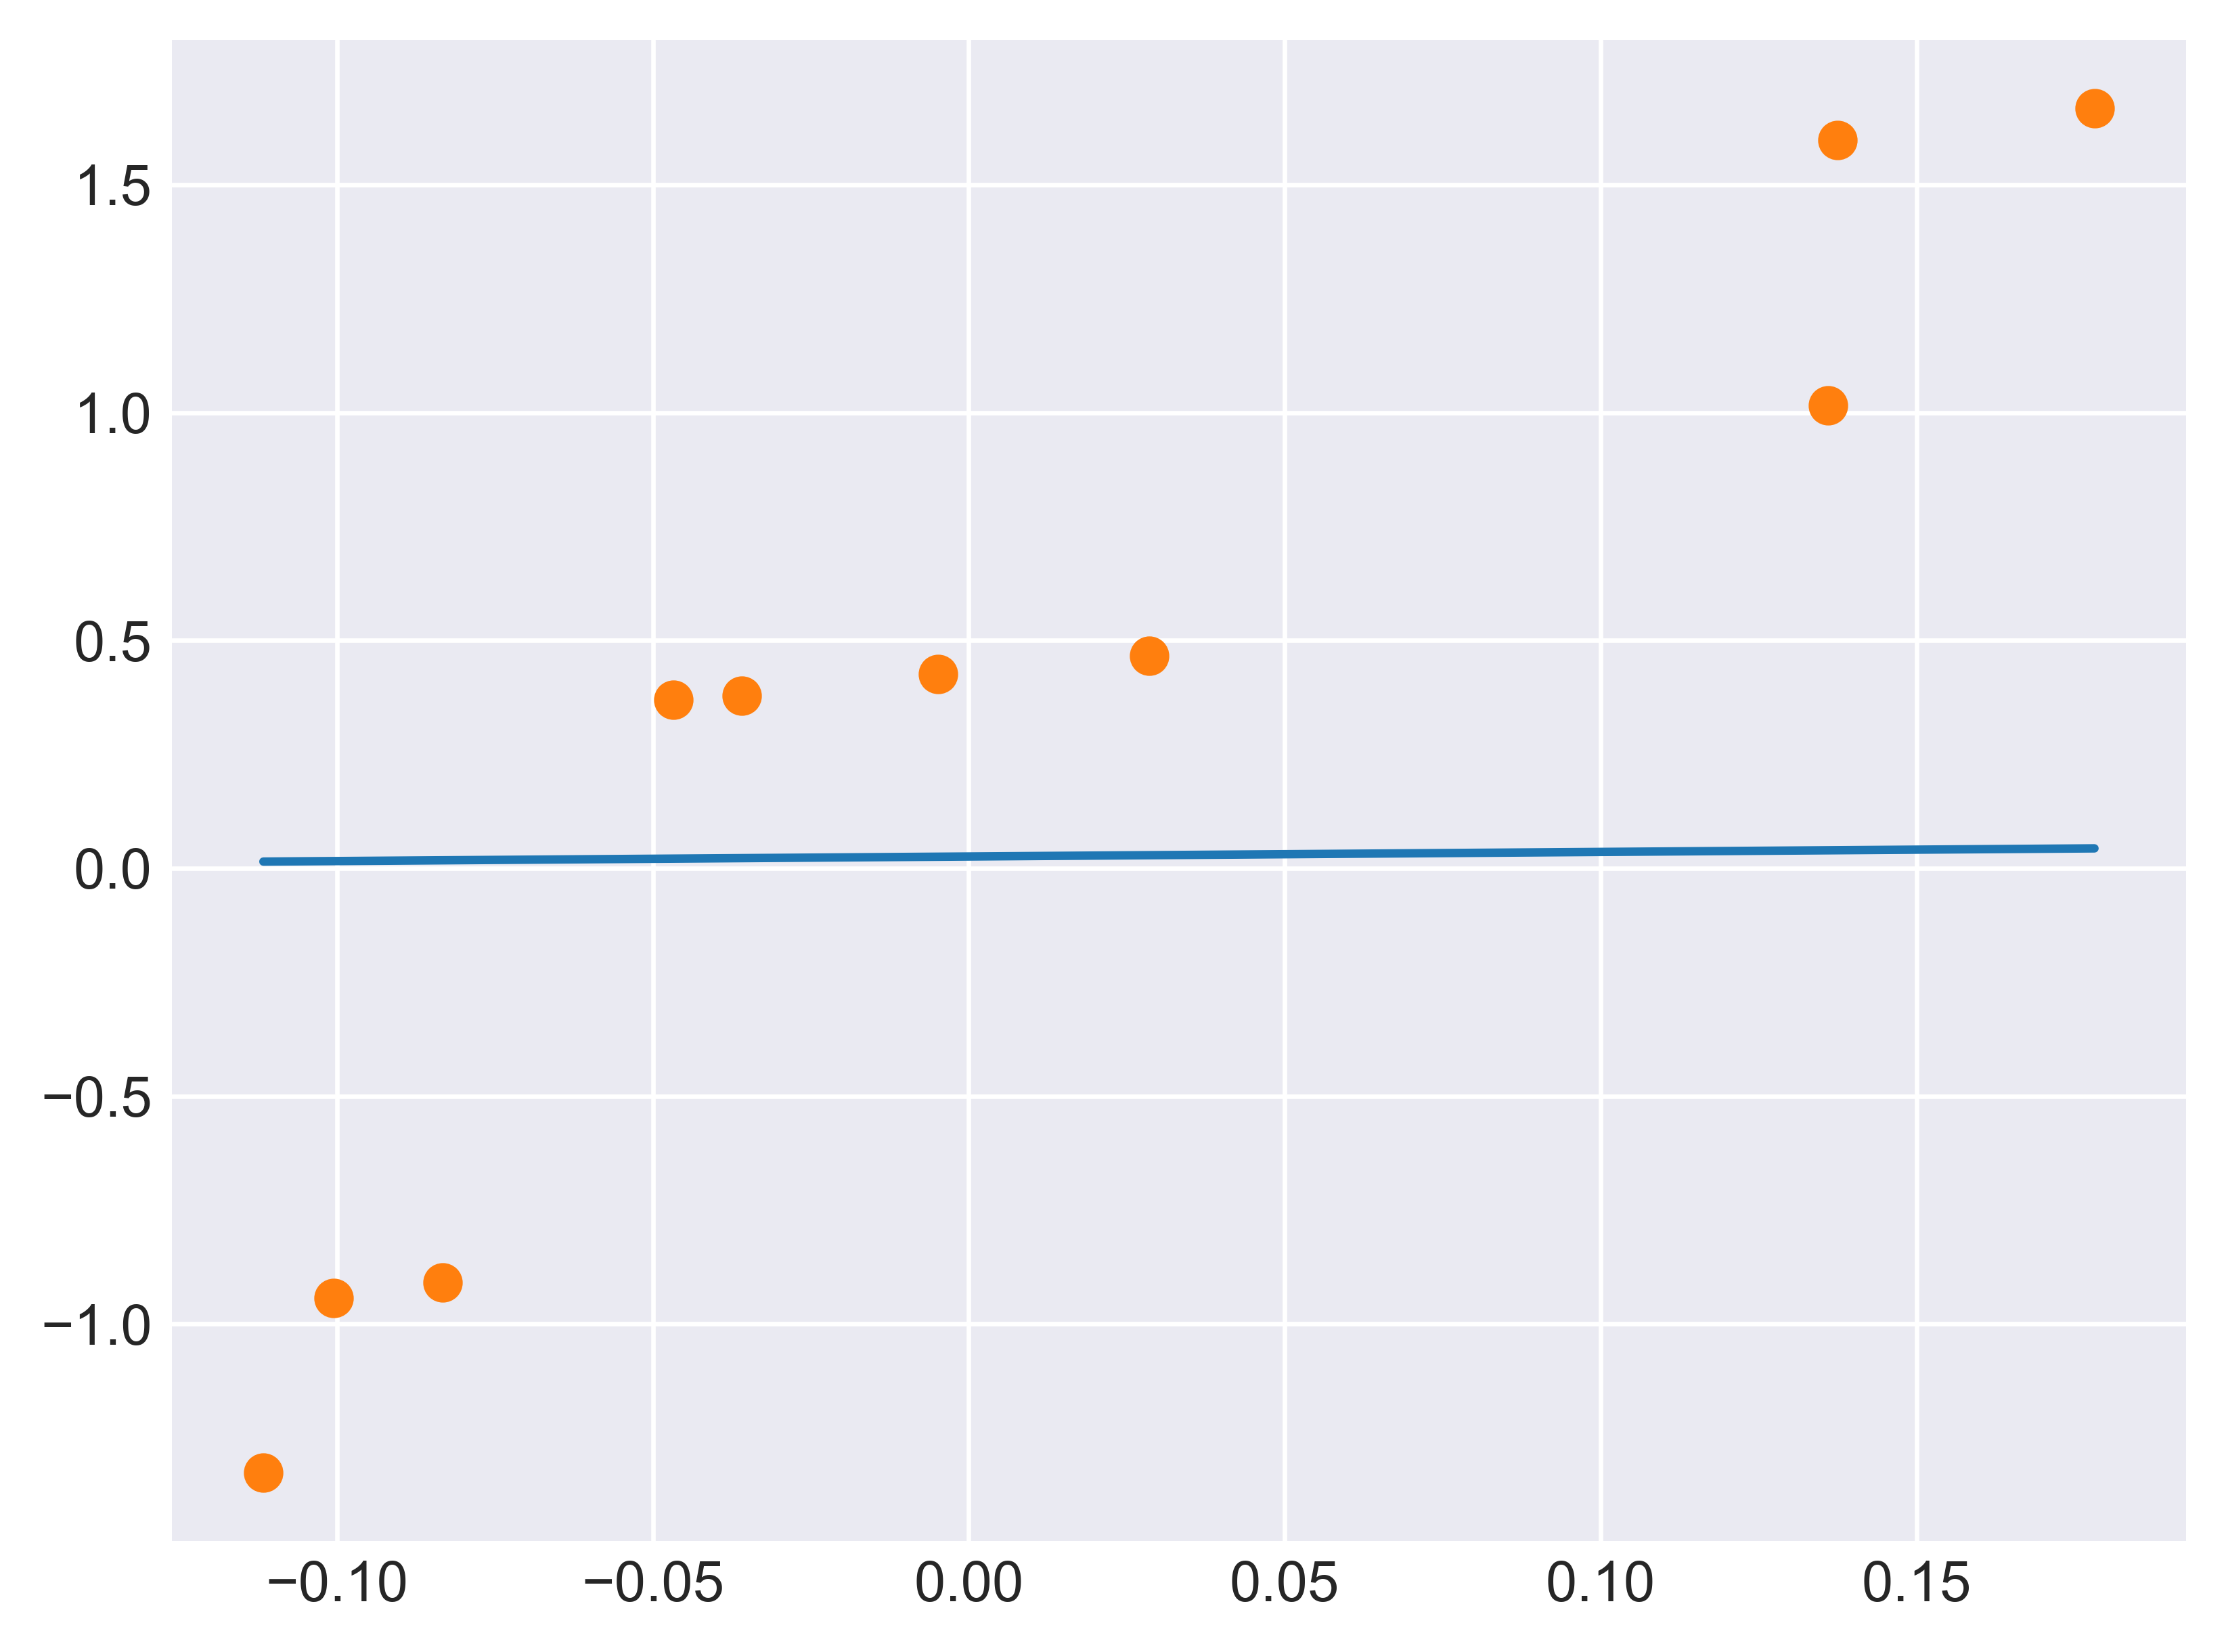

In [91]:
fig = plt.figure(dpi = 600)
plt.plot(t_c.numpy(), t_p.detach().numpy())
plt.plot(t_c.numpy(), t_u.numpy(), 'o')

## 优化器

In [92]:
import torch.optim as optim

In [94]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

# 神经网络

In [2]:
import torch
import torch.nn as nn

## 连接模型的容器

In [3]:
# 1.制作一个模型参数序列
seq_model = nn.Sequential(nn.Linear(1,13),nn.Tanh(),nn.Linear(13,1))

In [4]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [5]:
# 2.检查参数
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [7]:
# 3.检查参数名和参数
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


# 图像识别

In [8]:
from torchvision import datasets

## CIFAR-10下载

In [9]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',


In [18]:
# 1.导入数据
cifar10 = datasets.CIFAR10(root='./data/cifar-10-python/', train=True, download=False)
cifar10_val = datasets.CIFAR10(root='./data/cifar-10-python/', train=False, download=False)

In [19]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

## Dataset类

In [30]:
import matplotlib.pyplot as plt
from torchvision import transforms

In [25]:
# 1.获取图片和标签
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

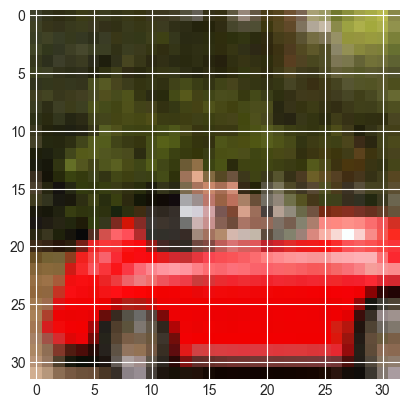

In [29]:
# 2.展示图片
plt.style.use('seaborn-darkgrid')
plt.imshow(img)
plt.show()

In [31]:
# 3.dataset变换
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [32]:
# 4.将图片转成张量
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [33]:
# 4.将整个数据集转成张量
tensor_cifar10 = datasets.CIFAR10(root='./data/cifar-10-python/', 
                                  train=True, download=False,
                                  transform=transforms.ToTensor())

In [35]:
img_t, _ = tensor_cifar10[99]
type(img_t), img_t.shape

(torch.Tensor, torch.Size([3, 32, 32]))

In [36]:
# 5.查看图片中每个通道的值
img_t.min(),img_t.max()

(tensor(0.), tensor(1.))

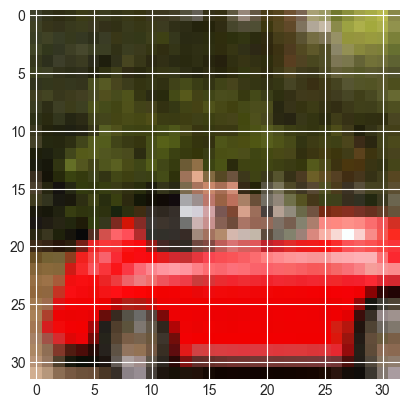

In [39]:
# 6.验证得到的图像是否相同
plt.imshow(img_t.permute(1,2,0))  #plt可以展示[H, W, C]
plt.show()

In [40]:
# 7.数据归一化
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [41]:
# 相当一计算每个通道上所有样本的每个像素的均值
imgs.view(3,-1).mean(dim=1) #保留3个通道，合为一个维度，计算第二个维度的均值

tensor([0.4914, 0.4822, 0.4465])

In [42]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [43]:
# Normalize归一化
transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616])

Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.2435, 0.2616])

In [49]:
transform_cifar10 = datasets.CIFAR10(root='./data/cifar-10-python/', 
                                  train=True, download=False,
                                  transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.4914, 0.4822, 0.4465],
                                                          [0.2470, 0.2435, 0.2616])
                                  ]))

In [53]:
img_t, _ = transform_cifar10[99]
img_t.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


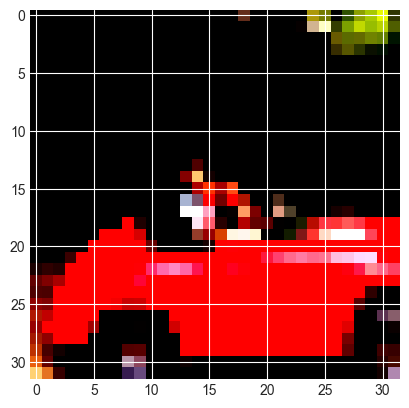

In [54]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

## 实现一个简单的分类器

In [55]:
# 1.构建数据集
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

In [56]:
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [57]:
# 2.构建一个全连接层模型
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            #
            nn.Linear(8*8*8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [58]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

TypeError: conv2d() received an invalid combination of arguments - got (Image, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
